<a href="https://colab.research.google.com/github/anky19698/Capstone/blob/main/Employee_Retention_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P(A)CE - ANALYZE STAGE
## Exploratory Data Analysis
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers we need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques we are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today.

The purposes of EDA before constructing a predictive model -



1.   To understand which variables are present in the data
2.   To consider the distribution of features, such as minimum, mean, and maximum values
3. To plot the relationship between the independent and dependent variables and visualize which features have a linear relationship
4. To identify issues with the data, such as incorrect or missing values.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('HR.csv')

In [ ]:
df.head()

df = df.drop_duplicates()

In [ ]:
df.rename(columns = {'average_montly_hours': 'average_monthly_hours'}, inplace=True)
df.rename(columns = {'time_spend_company': 'tenure'}, inplace=True)

In [ ]:
# gathering descriptive statistics
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


From the descriptive statistics we can get the following general idea of the employees-

1. The range of satisfaction-level is 0.09 - 1.00.
2. The range of last_evaluation is 0.36 - 1.00. It doesn't contain information of employees below 0.36 evaluation level.
3. The minimum number of projects is 2 and maximum is 7. There's no information of employees with 0 or 1 project and more than 7 projects.
4. The average_monthly_hours has a wide range with a large standard deviation. Assuming a standard five-day workweek, there are approximately 22.4375 working days in a month on average. Then the minimum daily working hour is 4 hours and maximum daily working hour is 13.81.
5. The dataset contains information only of employees more than 2 years tenure upto 10 years.
6. There are 10 departments in this company with number of employees in Sales being highest.
7. There are 3 salary types - Low, Medium and High with Low being prominant.
8. 'left' is the most important metric to evaluate the employee retention rate.

In [ ]:
df.shape

(11991, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [ ]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
# looking for imbalance in the data set
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [ ]:
# class imbalance percentage
print("The percentage of majority class is:", round((len(df[df['left']==0])/df.shape[0])* 100, 2),'%')

The percentage of majority class is: 83.4 %


## Data Visualizations

### 1. Distribution of numerical datatypes

<function matplotlib.pyplot.show(close=None, block=None)>

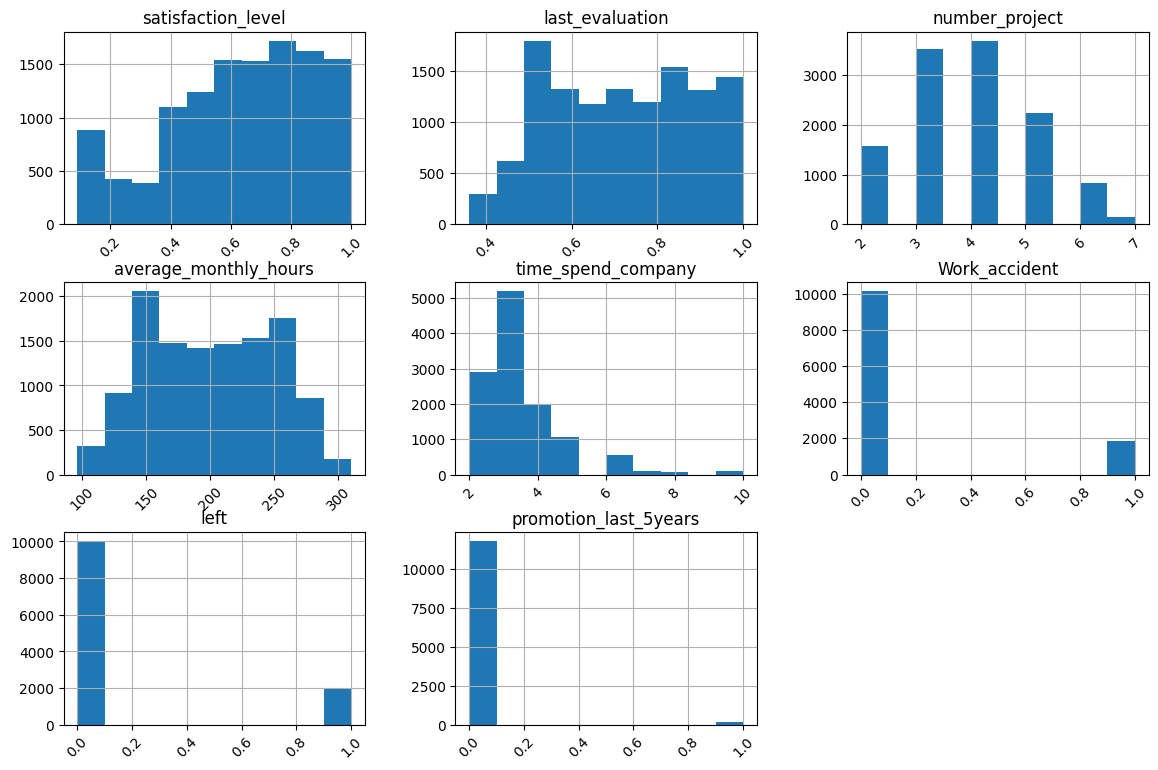

In [ ]:
df.hist(figsize=(14,9), xrot=45)
plt.show

### 2. Distribution of categorical datatypes

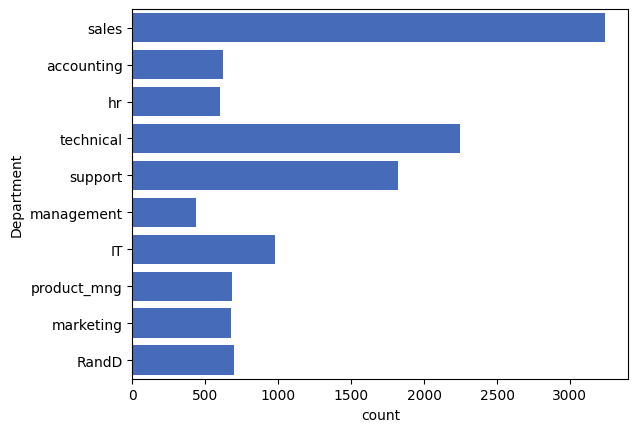

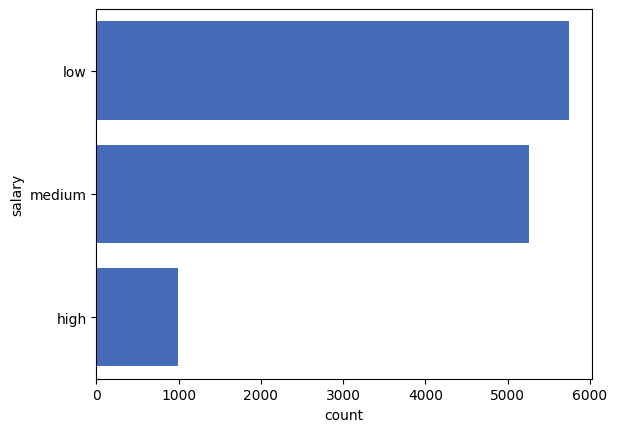

In [ ]:
for column in df.select_dtypes(include='object'):
    sns.countplot(y=column, data=df, palette=["#3366cc"])
    plt.show()

### 3. Correlation Matrix and Heatmap

In [ ]:
# creating a correlation matrix
corr=df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


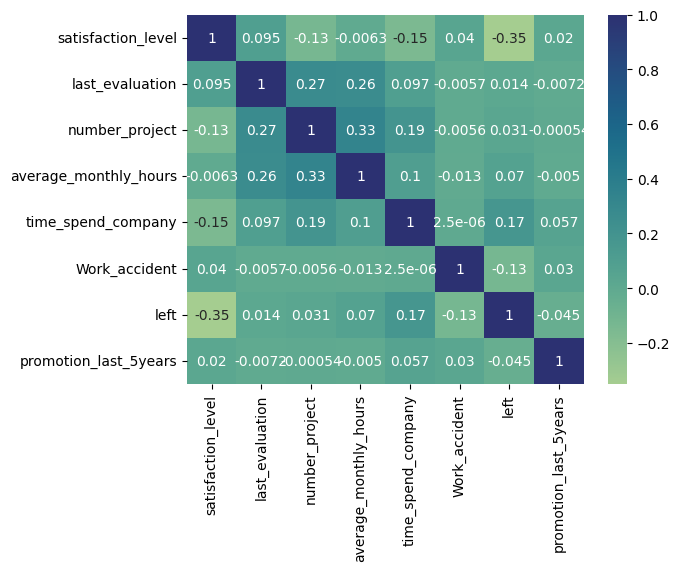

In [ ]:
# heatmap of the correlation matrix
sns.heatmap(corr, cmap='crest',annot=True)
plt.show()

As we can see, satisfaction_level has more relationship with left, compared to other variables. In addition, there are no other variables that strongly correlated with 'left' variable.

### 4. A boxplot and a regplot of employee retention based on the satisfaction_level.

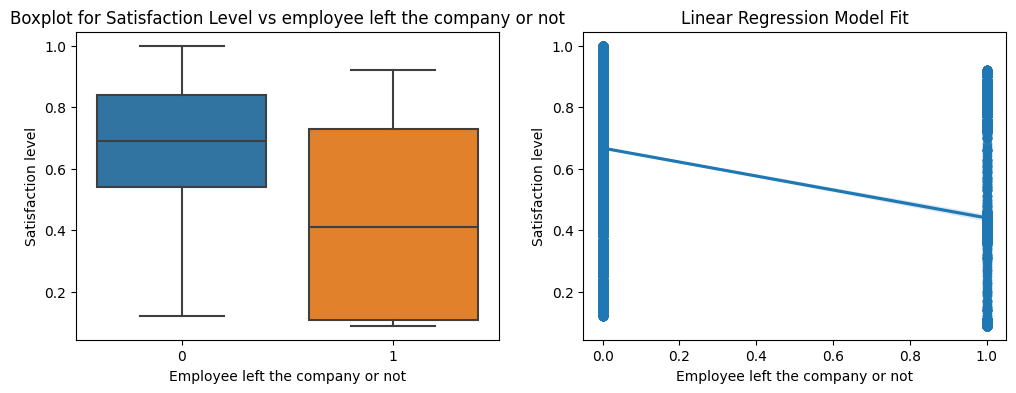

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x='left',y='satisfaction_level', showfliers=False, data=df, ax=axes[0])
axes[0].set_xlabel("Employee left the company or not")
axes[0].set_ylabel("Satisfaction level")
axes[0].set_title("Boxplot for Satisfaction Level vs employee left the company or not")

sns.regplot(x='left',y='satisfaction_level', data=df, ax=axes[1])
axes[1].set_xlabel("Employee left the company or not")
axes[1].set_ylabel("Satisfaction level")
axes[1].set_title("Linear Regression Model Fit")

plt.show()

### 5. A histplot that shows the overall satisfaction_level for all employees in this dataset.

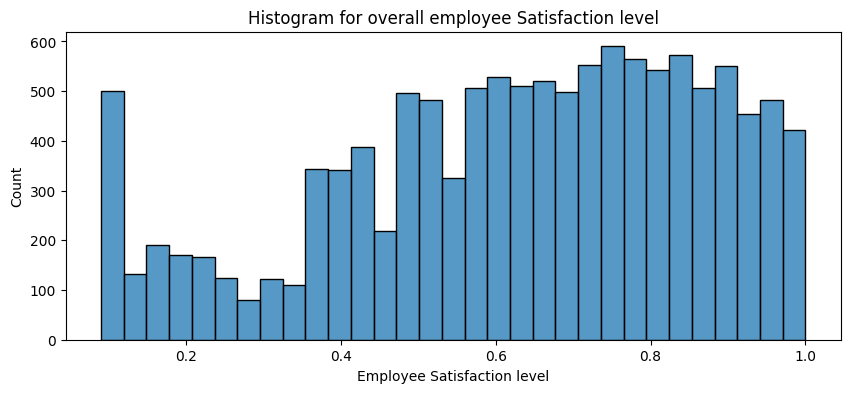

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='satisfaction_level')
plt.xlabel('Employee Satisfaction level')
plt.title("Histogram for overall employee Satisfaction level")
plt.show()

From this histogram, we can see that the lowest satisfaction level is below 0.2. Majority of the employees who had a satisfaction level higher than 0.5.

### 6. Histogram plots of satisfaction_level based on if the employee left.

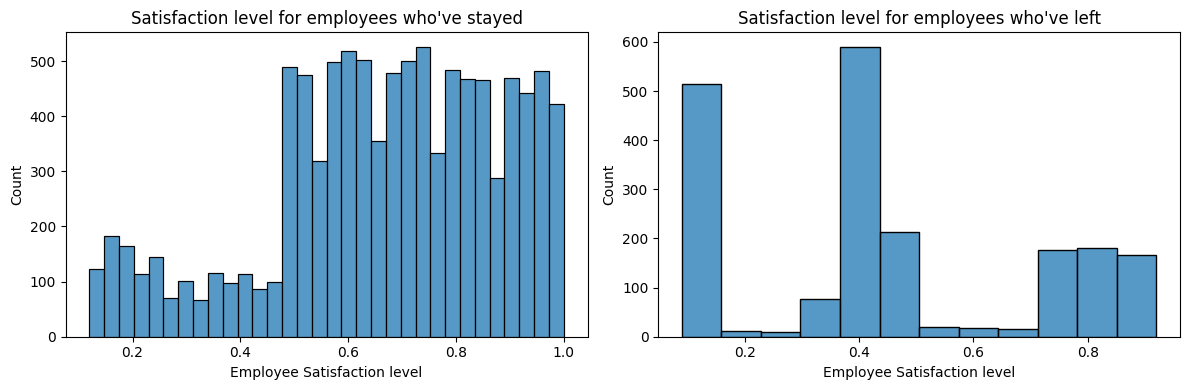

In [ ]:
# Creating 2 data frames for employees remained and left
df_stay = df[df['left']==0]
df_left = df[df['left']==1]

# plotting the histograms
fig, axes=plt.subplots(1,2, figsize=(12,4))
sns.histplot(df_stay, x='satisfaction_level', ax=axes[0])
axes[0].set_xlabel('Employee Satisfaction level')
axes[0].set_title('Satisfaction level for employees who\'ve stayed')

sns.histplot(df_left, x='satisfaction_level', ax=axes[1])
axes[1].set_xlabel('Employee Satisfaction level')
axes[1].set_title('Satisfaction level for employees who\'ve left')

plt.tight_layout()
plt.show()

From these histograms we can observe some interesting observations-

1. Some employees who've stayed in the company have given lower satisfaction rate (less than 0.5).
2. Majority of these employees gave a satisfaction rate between 0.5-1.0.
3. The employees who've left the company gave a lower satisfaction rate(<0.4).
4. But there are some employees who've given higher satisfaction rates and still left the company(>0.7).

### 7. A boxplot of employee retention based on the last_evaluation.

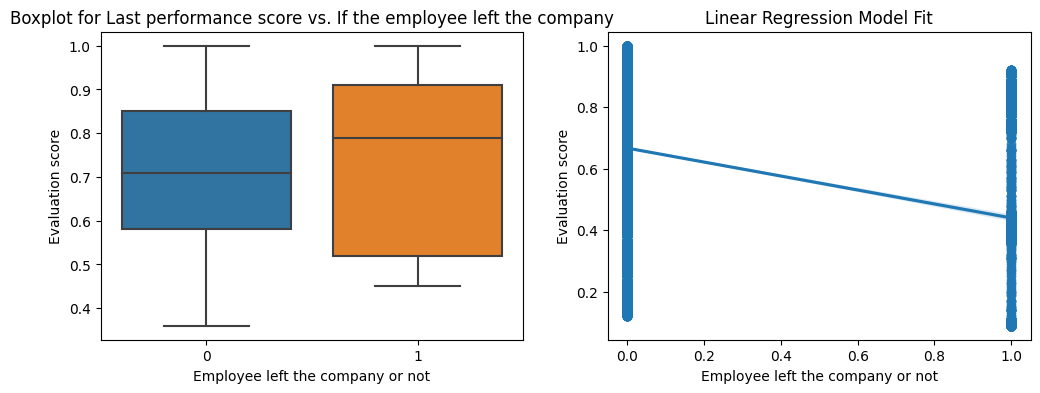

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(df, x='left',y='last_evaluation', ax=axes[0])
axes[0].set_xlabel('Employee left the company or not')
axes[0].set_ylabel('Evaluation score')
axes[0].set_title('Boxplot for Last performance score vs. If the employee left the company')

sns.regplot(x='left',y='satisfaction_level', data=df, ax=axes[1])
axes[1].set_xlabel("Employee left the company or not")
axes[1].set_ylabel("Evaluation score")
axes[1].set_title("Linear Regression Model Fit")

plt.show()

### 8. Histogram for employee evaluation score

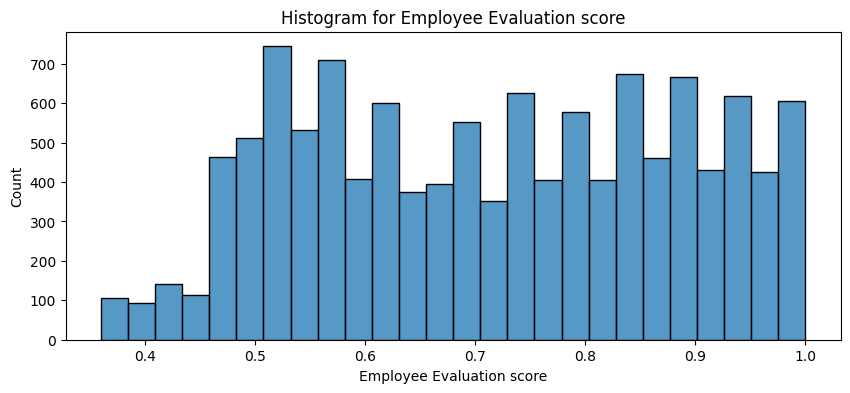

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='last_evaluation')
plt.xlabel('Employee Evaluation score')
plt.title("Histogram for Employee Evaluation score")
plt.show()

### 9. Comparison of two histogram plots of last_evaluation based on if the employee left.

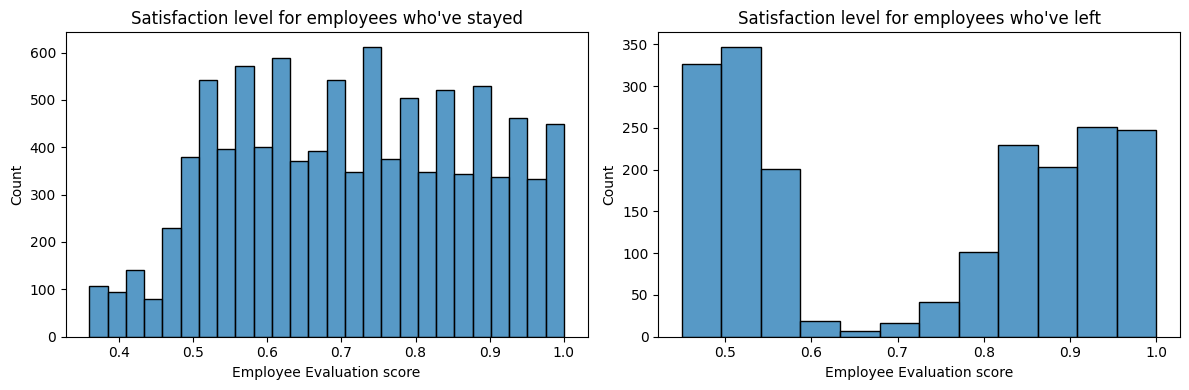

In [ ]:
# plotting the histograms
fig, axes=plt.subplots(1,2, figsize=(12,4))
sns.histplot(df_stay, x='last_evaluation', ax=axes[0])
axes[0].set_xlabel('Employee Evaluation score')
axes[0].set_title('Satisfaction level for employees who\'ve stayed')

sns.histplot(df_left, x='last_evaluation', ax=axes[1])
axes[1].set_xlabel('Employee Evaluation score')
axes[1].set_title('Satisfaction level for employees who\'ve left')

plt.tight_layout()
plt.show()

Observations from the two employee evaluation histograms-

1. Majority of the employees stayed has a evaluation higher than 0.5
2. There are some employees who have low evaluation score, still they're working in the company
3. Majority of the employees who've left have a low evaluation score between 0.45 to 0.6
4. But some of them have higher evaluation score as well(>0.8).

### 10. Relation between satisfaction level and evaluation score

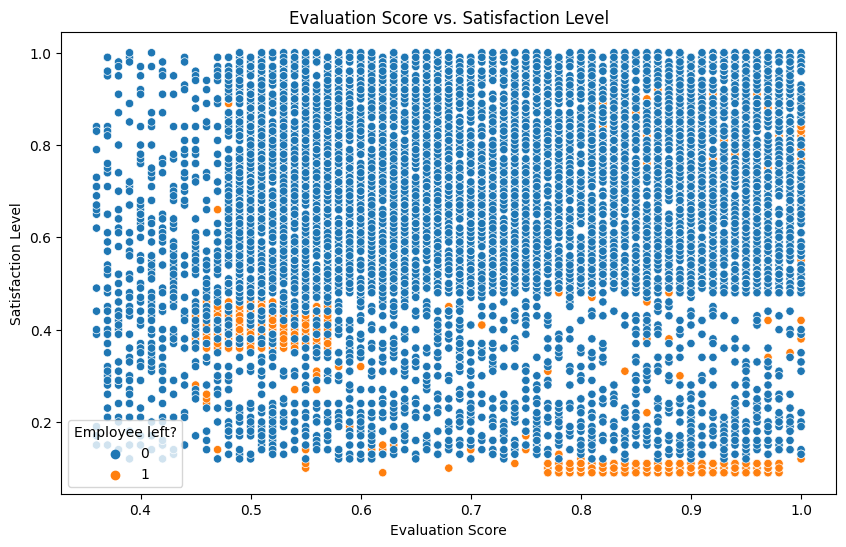

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'last_evaluation', y = 'satisfaction_level', hue = 'left')
plt.xlabel("Evaluation Score")
plt.ylabel("Satisfaction Level")
plt.title("Evaluation Score vs. Satisfaction Level")
plt.legend(title = "Employee left?")
plt.show()

From this scatterplot we can clearly see 2 groups of employees who've left and their status based on their satisfaction and evaluation score-

1. Group 1 has both lower satisfaction level as well as evaluation score
2. Group 2 has high evaluation score but low satisfaction level

Majority of the employee who've stayed in the company have satisfaction level and evaluation score between 0.5-1.0 and there are still people who stayed with low satisfaction level and evaluation score.

### 11. A countplot of employee retention based on the number_project

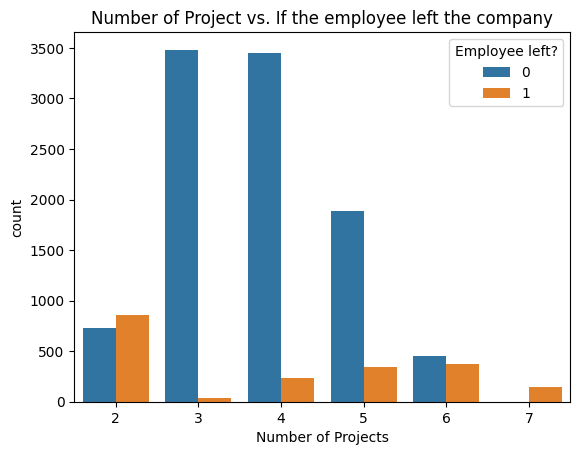

In [ ]:
sns.countplot(data = df, x = 'number_project', hue = 'left')
plt.xlabel("Number of Projects")
plt.title("Number of Project vs. If the employee left the company")
plt.legend(title = "Employee left?")
plt.show()

The majority of the employees left had 2 projects. While the employee who've stayed had 3 or more projects. The number of remained employees decreases as number of project increases. The employees with 7 projects have all left.

So, the chance of turn over increases as employees are tasked with more projects.

### 12. Scatterplot for Number of projects vs satisfaction level

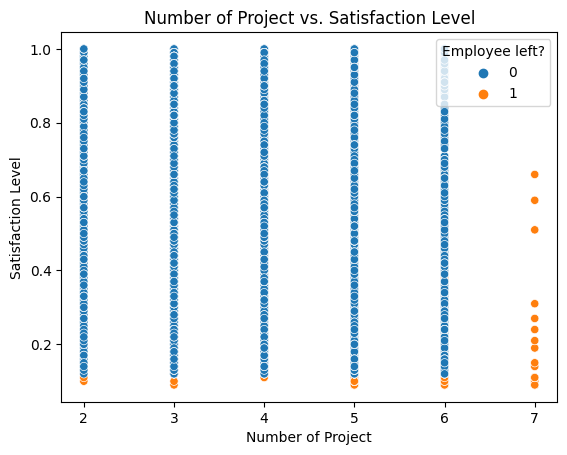

In [ ]:
sns.scatterplot(data = df, x = 'number_project', y = 'satisfaction_level', hue = 'left')
plt.xlabel("Number of Project")
plt.ylabel("Satisfaction Level")
plt.title("Number of Project vs. Satisfaction Level")
plt.legend(title = "Employee left?")
plt.show()

In the histogram of Satisfaction Level, we saw some employees who've left the company giving higher scores of satisfaction. When the employees leave the company, the satisfaction level is very low, except when they have 7 projects. So the employees who've 7 projects were satisfied with the company but nonetheless left the company because of some other reasons.

### 13. Average monthly working hours Histogram

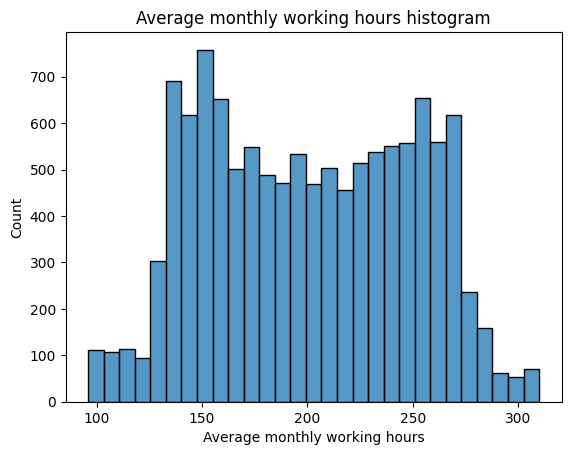

In [ ]:
sns.histplot(df, x='average_monthly_hours')
plt.xlabel('Average monthly working hours')
plt.title('Average monthly working hours histogram')
plt.show()

### 14. Boxplot for Monthly working hours Vs employee left the company or not

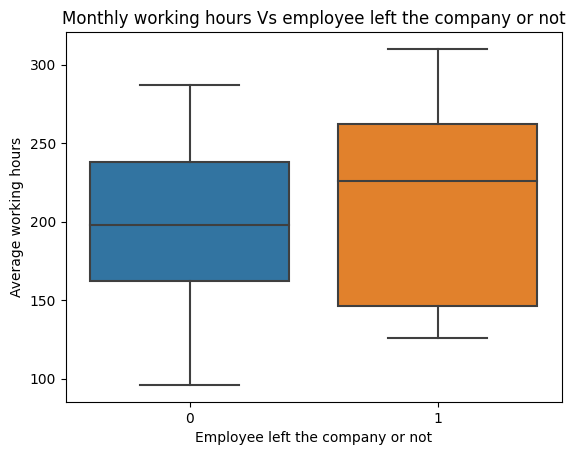

In [ ]:
sns.boxplot(data=df, x='left', y='average_monthly_hours')
plt.xlabel('Employee left the company or not')
plt.ylabel('Average working hours')
plt.title('Monthly working hours Vs employee left the company or not')
plt.show()

In this boxplot, we can see the employees who left the company had more average monthly work hours than the employees who stayed in the company.

In [ ]:
# average working hours per month
df['average_monthly_hours'].mean()

200.4735218080227

In [ ]:
# gives the most frequent working hours for employees left and stayed
df['average_monthly_hours'].mode()

0    149
1    156
Name: average_monthly_hours, dtype: int64

According to Zippia there are an average of around 176 work hours in a month. It is based on the assumption of 22 workdays in a month, a conventional five-day workweek, an average of the traditional 8-hour workday, and excludes both holidays and weekends. Working longer than ~176 is considered as working over time.

Keeping this in mind, we can see the minimum working hour is 96 hours/month i.e., ~4 hours/day and the maximum working hour is 310 hours/month i.e., ~13 hours/day. Moreover,the average_monthly_hours is ~ 200 hours which implies that most of the employees were working overtime.

Working overtime can be a reason of low satisfaction level in employees and it might influence an employee's decision to leave.

In [ ]:
# percentage of employees working over time
overtime =(len(df[df['average_monthly_hours']>176])/df['average_monthly_hours'].shape[0]) *100
print(f'The percentage of employees working over 176 hours/month is {overtime:.2f}%')

The percentage of employees working over 176 hours/month is 63.06%


In [ ]:
# creating a dataframe of overtime employees
overtime_emp=df[df['average_monthly_hours']>176]

# counting the overtime employees who've left
print(overtime_emp['left'].value_counts())
print('\n')

# percentage of the overtime employees who've left
percent_ot=len(overtime_emp[overtime_emp['left']==1])/overtime_emp['left'].shape[0] * 100
print(f'Percentage of overtime employees who\'ve left the company is {percent_ot:.2f}%')
print('\n')

# descriptive statistics for satisfaction level of overtime employees
overtime_emp['satisfaction_level'].describe()

0    6460
1    1101
Name: left, dtype: int64


Percentage of overtime employees who've left the company is 14.56%




count    7561.000000
mean        0.644238
std         0.251796
min         0.090000
25%         0.520000
50%         0.690000
75%         0.840000
max         1.000000
Name: satisfaction_level, dtype: float64

# PA(C)E - CONSTRUCT STAGE

## Logistic Regression
Introduction:
Classification is an area of supervised machine learning that tries to predict which class or category some entity belongs to, based on its features. Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic Regression is a technique that models a categorical dependent variable (Y) based on one or more independent variables(X).

Logistic regression uses the concept of predictive modeling as regression; therefore, it is called logistic regression, but is used to classify samples; Therefore, it falls under the classification algorithm.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

Logistic Function (Sigmoid Function):
The sigmoid function is a mathematical function used to map the predicted values to probabilities. It maps any real value into another value within a range of 0 and 1. The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function.

In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

Assumptions for Logistic Regression:
The dependent variable must be categorical and binary / dichotomous.
There should be little or no multicollinearity between the independent variables.
There is linear relationship of variables to log odds.
Requires sufficiently large sample size.
There are no extreme outliers.
Should have independent observations.
Steps in Logistic Regression:
1. Import packages, functions, and classes
2. Get data to work with and, if appropriate, transform it
3. Create a classification model and train (or fit) it with existing data
4. Predicting the test result
5. Test accuracy of the result(Creation of Confusion matrix)

## Step 1 - Importing the packages

In [ ]:
# importing required packages
# operational packages
import pandas as pd
import numpy as np

# regression modelling packages
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay

# visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Step 2 - Loading the data and manipulating it

<Axes: xlabel='tenure'>

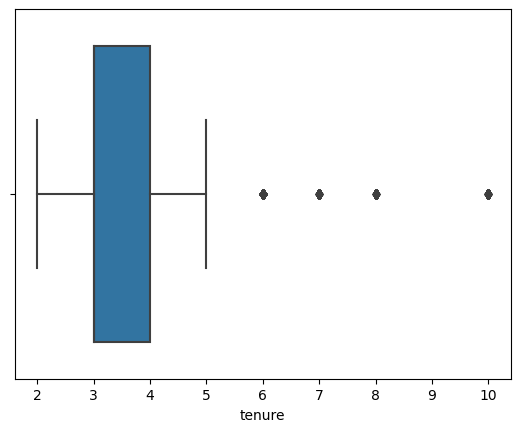

In [ ]:
# looking for outliers in 'tenure'
sns.boxplot(data=df, x='tenure')

In [ ]:
# removing the outliers
tenure_iqr = df['tenure'].quantile(0.75) - df['tenure'].quantile(0.25)
tenure_upper_limit = df['tenure'].quantile(0.75) + 1.5 * tenure_iqr
tenure_lower_limit = df['tenure'].quantile(0.25) - 1.5 * tenure_iqr

# creating a new data frame without the outliers
df = df.loc[(df['tenure'] < tenure_upper_limit) | (df['tenure'] > tenure_lower_limit)]

df.head(6)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


<Axes: >

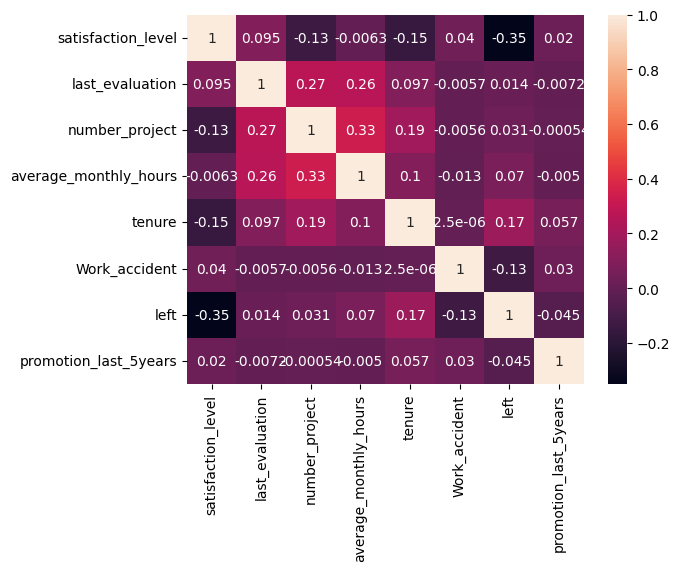

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [ ]:
print("The percentage of majority class is:", round((len(df[df['left']==0])/df.shape[0])* 100, 2),'%')

The percentage of majority class is: 83.4 %


Defining the independent and dependent variables
Our dependent or response variable is 'left' i.e. we are trying to find out whether or not an employee will leave the company, based on other independent variables.

From the heatmap we can see, left is negatively correlated with satisfaction level. Moreover there is no strong correlation among any of the variables. But satisfaction level itself may be influenced by other factors such as working hours, promoted or not, evaluation score, project number etc.

For the purpose of this project, we'll use only 'satisfaction_level' as our independent variable.

Checking the model assumptions
1. The dependent variable 'left' is binary i.e. it has only two results 0 (if the employee didn't leave) and 1 (if the employee left).
2. There is little or no multicollinearity between the predictor variables as can be seen from the heatmap and correlation matrix.
3. For this test we assume that there's a linear relation of independent variables to log odds.
4. There are no extreme outliers since we've already removed them from 'tenure' column.
5. For this test we assume that the observations are independent of each other.

## Step 3 - Creating Classification model and fitting the data

In [ ]:
# Dependent variable (y) - 'left'
y = df[['left']]

# Independent variable (X) - 'satisfaction_level'
X = df[['satisfaction_level']]

In [ ]:
# Split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# Instantiate the model
clf_log = LogisticRegression()

# Fit the model using the training data
clf=clf_log.fit(X_train,y_train)

## Step 4 - Predicting the test results

The predict function works by assuming a threshold of 0.5. So if MLE predicts a value greater than or equal to 0.5, the predict function will label that observation a one. If MLE predicts a value less than 0.5, the predict function will label that observation a zero.

In statistics, Maximum Likelihood Estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.

The predict_proba function on the other hand, will allow us to check what probability was predicted for each data point.

The cls.coef_ and clf.intercept_ give the parameter estimations of the regresssion model. They denote the β0 and β1 respectively.

The clf.score gives the ratio of the number of correct predictions to the number of observations.

In [ ]:
# use model to make predictions on test data
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


In [ ]:
# matrix of probabilities of the predicted output
clf.predict_proba(X_test)[::,-1]

array([0.53573143, 0.09113835, 0.0715643 , ..., 0.09755904, 0.49820809,
       0.0667279 ])

In [ ]:
# value of the slope
clf.coef_

array([[-3.758437]])

In [ ]:

# value of the intercept
clf.intercept_

array([0.48142912])

In [ ]:
# Gives the ratio of the number of correct predictions to the number of observations
clf.score(X,y)

0.8739054290718039

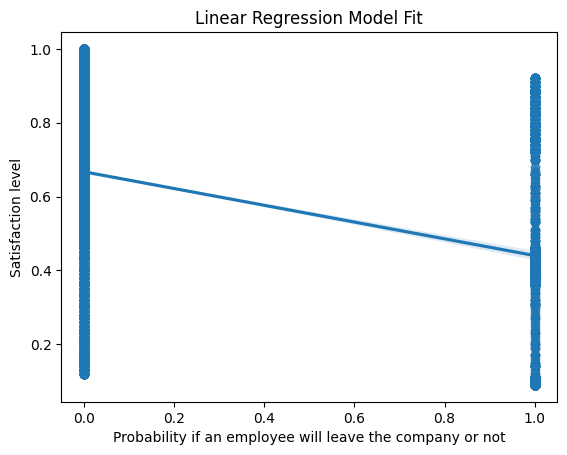

In [ ]:
# plotting a regression line using seaborn package
sns.regplot(x='left',y='satisfaction_level', data=df)
plt.xlabel("Probability if an employee will leave the company or not")
plt.ylabel("Satisfaction level")
plt.title("Linear Regression Model Fit")

plt.show()

## Step 5 - Testing the accuracy of the results

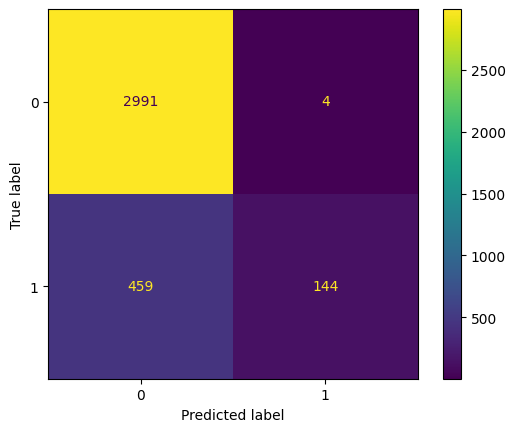

In [ ]:
# Confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
print("Accuracy:",'%.3f' % metrics.accuracy_score(y_test, y_pred))
print("Precision:", '%.3f' % metrics.precision_score(y_test, y_pred))
print("Recall:", '%.3f' % metrics.recall_score(y_test, y_pred))
print("Specificity:", '%.3f' % recall_score(y_test, y_pred, pos_label=0))
print("f1 score:",'%.3f' % metrics.f1_score(y_test, y_pred))

Accuracy: 0.871
Precision: 0.973
Recall: 0.239
Specificity: 0.999
f1 score: 0.383


In [ ]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.87      1.00      0.93      2995
    Predicted would leave       0.97      0.24      0.38       603

                 accuracy                           0.87      3598
                macro avg       0.92      0.62      0.66      3598
             weighted avg       0.88      0.87      0.84      3598



In [ ]:
# ROC-AUC score
metrics.roc_auc_score(y_test,y_pred)

0.6187352054419057

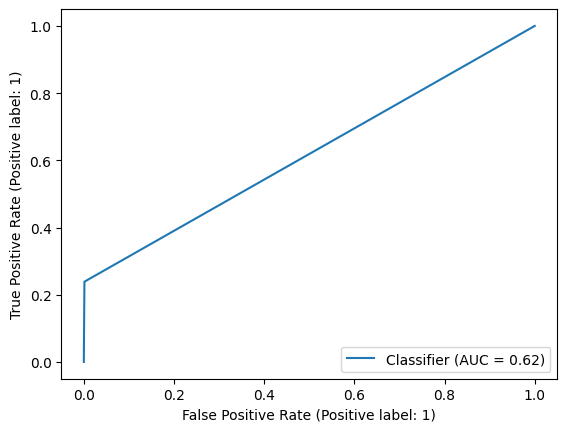

In [ ]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

## Interpreting the results
Logistic regression is a powerful technique for categorical prediction tasks in data science. Data professionals often use metrics such as precision, recall, and accuracy, as well as visualizations such as ROC curves, to gauge the performance of their logistic regression models. It is important to evaluate the performance of a model, as this shows how well the model can make predictions. The results from applying metrics can be used to report how well a model performs to relevant stakeholders.

The logit function: When the logit function is written in terms of the independent variables, it conveys the following: there is a linear relationship between each independent variable,X, and the logit of the probability that the dependent variable,y equals 1. The logit of that probability is the logarithm of the odds of that probability.

Logit is the most common link function used to linearly relate the X variables to the probability of Y.

Coefficients: When we fit a logistic regression model, the coefficients in the model output represent the average change in the log odds of the response variable associated with a one unit increase in the predictor variable.

Often we’re more interested in understanding the average change in the odds of the response variable associated with a one unit increase in the predictor variable, which we can find by using the formula e^β.

To access the coefficient β1 estimated by the model, we've used clf.coef_. For our model, β1= -3.758437

If the estimated β1 is -3.758437, for example, that means a one-unit decrease in satisfaction level is associated with a 3.75 increase in the log odds of p. To interpret change in odds of Y as a percentage, we exponentiate β1 , as follows e^β1 = e^(-3.758437) ≈ 0.02332

So, for every one-unit decrease in satisfaction level, we can expect that the odds that the employee will leave is increased by 2.33 %.

Confusion Matrix: A graphical representation of how accurate a classifier is at predicting the labels for a categorical variable.

Screenshot%20%28603%29.png

True negatives: The count of observations that the classifier correctly predicted as False (0). In this case , the classifier correctly predicted 2991 employees who didn't leave.

True positives: The count of observations that a classifier correctly predicted as True (1) i.e. the classifier correctly predicted 144 employees who left.

False positives: The count of observations that a classifier incorrectly predicted as True (1) i.e. the classifier predicted 4 employees left who in reality didn't leave.

False negatives: The count of observations that a classifier incorrectly predicted as False (0). In this case, the classifier predicted 459 employees who didn't leave but in reality who left the company.

The False negatives may cause the company to spend more resources on an employee who decides to leave. The False positives may cause the company to think an employee will leave and won't put resources into this employee. False negatives will be worse for the company, false positives will be worse for employees.

Accuracy: Refers to the proportion of data points that were correctly categorized. Accuracy is an appropriate metric to use when the data is balanced, in other words, when the data has a roughly equal number of positive examples and negative examples. Otherwise, accuracy can be biased.

In this case accuracy will tell us how many correct predictions were made by the model. The model as a relatively high accuracy score of 0.8713 or 87.13% which is not surprising as the data is imbalanced with the majority of the class (employee who stayed) comprises 83.4 % of the total dataset. Thus accuracy is not the right metric to evaluate the model's performance.

Recall(Sensitivity): The proportion of positives the model was able to identify correctly.

In this case recall tells us how many employees we correctly predicted to be left out of all the left(positive) predictions.The model gives a recall score of 0.2388 or 23.88 %. The model incorrectly predicted majority of the employees who left as employees who've stayed.

Using recall as an evaluation metric is especially helpful in this context where the cost of a false negative is quite high (the company will assume these employees will stay and spend resources on them while in reality they're most likely to leave).

Specificity: The proportion of negatives the model was able to identify correctly.

In this case specificity tells us how many employees we correctly predicted to stay out of all the not left/stayed (negative) predictions.The model gives a specificity score of 0.9986 or 99.86 %. The model correctly predicted majority of the employees who stayed as employees who've actually stayed.

Precision: The proportion of positive predictions that were true positives.

In this case precision would tell us among the employees we predicted to be left, how many of them are actually left. The model gives a precision score of 0.9729 or 97.3 %.

f1 Score: It’s a harmonic mean of “precision” & “recall”, taking both the metrics into account. In this case f1-score is very low 0.3834.

Support: It is the total entries of each class in the actual dataset. It is simply the sum of rows for every class. The number of total left employee predicted was 603 and stayed employee predicted were 2995.

ROC Score: We can examine an ROC curve to observe how the False Positive Rate and True Positive Rate change together over the different thresholds. In the ROC curve for an ideal model, there would exist a threshold at which the True Positive Rate is high and the False Positive Rate is low. The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data.

In this case, the roc_auc_score() function returns 0.6187, that means ~ 62% of the classifier’s predictions are correct across all classification thresholds.